In [1]:
import pandas as pd
import matplotlib.pyplot as plt
reviews = pd.read_csv('fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']
norm_reviews = reviews[cols]
print(norm_reviews[:5])

                             FILM  RT_user_norm  Metacritic_user_nom  \
0  Avengers: Age of Ultron (2015)           4.3                 3.55   
1               Cinderella (2015)           4.0                 3.75   
2                  Ant-Man (2015)           4.5                 4.05   
3          Do You Believe? (2015)           4.2                 2.35   
4   Hot Tub Time Machine 2 (2015)           1.4                 1.70   

   IMDB_norm  Fandango_Ratingvalue  
0       3.90                   4.5  
1       3.55                   4.5  
2       3.90                   4.5  
3       2.70                   4.5  
4       2.55                   3.0  


## Getting the Frequency Distributions

In [4]:
fandango_distribution = norm_reviews["Fandango_Ratingvalue"].value_counts().sort_index()
imdb_distribution = norm_reviews["IMDB_norm"].value_counts().sort_index()

print(fandango_distribution.head())
print(imdb_distribution.head())


2.7    2
2.8    2
2.9    5
3.0    4
3.1    3
Name: Fandango_Ratingvalue, dtype: int64
2.00    1
2.10    1
2.15    1
2.20    1
2.30    2
Name: IMDB_norm, dtype: int64


 While we can quickly determine the minimum and maximum values, we struggle to answer the following questions about a column:

    What percent of the ratings are contained in the 2.0 to 4.0 range?
        How does this compare with other sites?
    Which values represent the top 25% of the ratings? The bottom 25%?
        How does this compare with other sites?


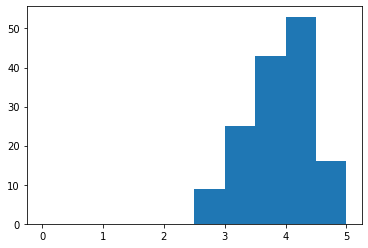

In [12]:
fig, ax = plt.subplots()
ax.hist(norm_reviews["Fandango_Ratingvalue"], range=(0,5))
plt.show()

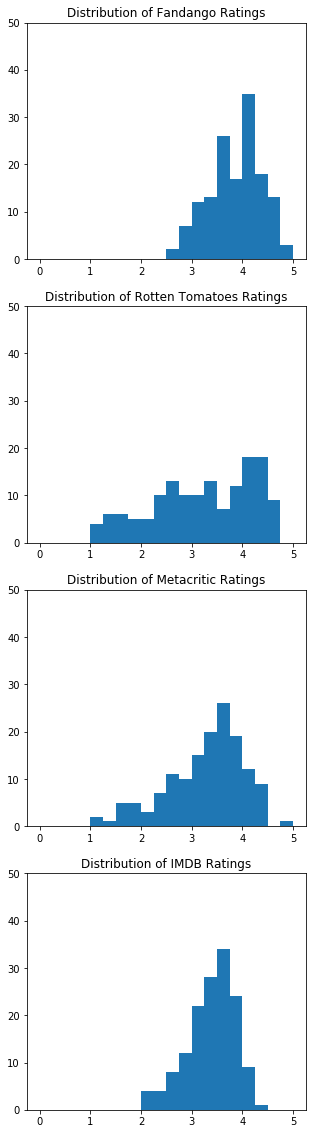

In [27]:
fig = plt.figure(figsize=(5,20))

ax1 = fig.add_subplot(4,1,1)
ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0,5))
ax1.set_title("Distribution of Fandango Ratings");
ax1.set_ylim(0, 50)

ax2 = fig.add_subplot(4,1,2)
ax2.hist(norm_reviews['RT_user_norm'], bins=20, range=(0,5))
ax2.set_title("Distribution of Rotten Tomatoes Ratings")
ax2.set_ylim(0, 50)

ax3 = fig.add_subplot(4,1,3)
ax3.hist(norm_reviews['Metacritic_user_nom'], bins=20, range=(0,5))
ax3.set_title("Distribution of Metacritic Ratings")
ax3.set_ylim(0, 50)

ax4 = fig.add_subplot(4,1,4)
ax4.hist(norm_reviews['IMDB_norm'], bins=20, range=(0,5))
ax4.set_title("Distribution of IMDB Ratings")
ax4.set_ylim(0, 50)

plt.show()

From the histograms, we can make the following observations:

    Around 50% of user ratings from Fandango fall in the 2 to 4 score range
    Around 50% of user ratings from Rotten Tomatoes fall in the 2 to 4 score range
    Around 75% of the user ratings from Metacritic fall in the 2 to 4 score range
    Around 90% of the user ratings from IMDB fall in the 2 to 4 score range


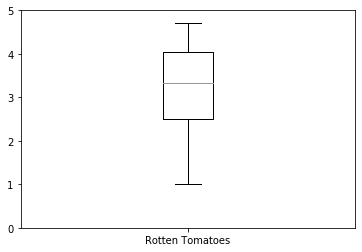

In [45]:
fig, ax = plt.subplots()
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_ylim(0, 5)
ax.set_xticklabels(['Rotten Tomatoes'])
plt.show()

From the box plot we generated using Rotten Tomatoes ratings, we can conclude that:

    the bottom 25% of user ratings range from around 1 to 2.5
    the top 25% of of user ratings range from around 4 to 4.6


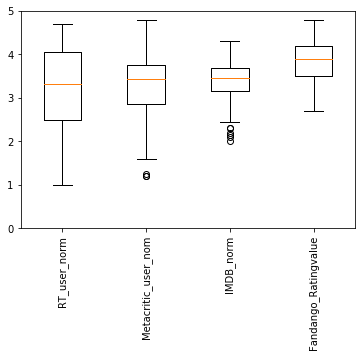

In [53]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']

fig, ax = plt.subplots()
ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_ylim(0,5)

plt.show()

From the boxplot, we can reach the following conclusions:

    user ratings from Rotten Tomatoes and Metacritic span a larger range of values
    user ratings from IMDB and Fandango are both skewed in the positive direction and span a more constrained range of values
